# 00. Contents

### 01. Importing libraries
### 02. Importing data frames
### 03. Creating visualizations
   ####    Creating histograms
   ####    Creating a bar chart
   ####    Creating a line chart for price and hour of the day relationship
   ####    Creating a line chart for age and dependant relationship
   ####    Creating a scatterplot
### 04. Exporting the Visualizations


# 01. Importing libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data frames

In [8]:
# Creating a path

path = r'/Users/agne/Documents/Studies/Data Analysis/Study Materials/Python/Instacart Basket Analysis 2020 11'

In [14]:
cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# 03. Creating visualizations

### Creating Histograms

<Axes: ylabel='Frequency'>

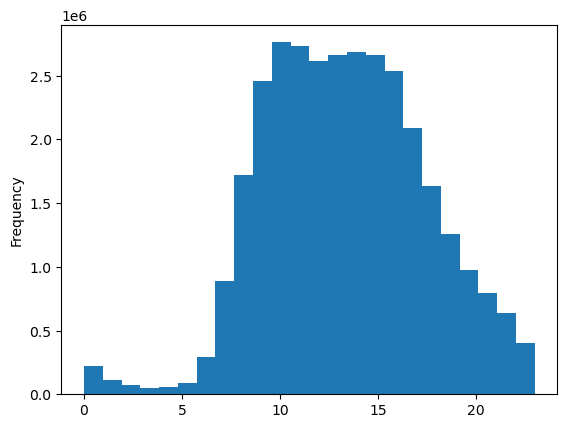

In [25]:
# Creating a histogram

cop['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows that the peak buying times are from 11 AM to around 4 PM when about 2.8 orders are made per hour. After that, the orders slowly taper off and reach 1 order per hour at 7 PM. Then, the orders get sparser all through the night, dropping to 0.1 orders at 4 AM, the lowest point in the graph. After that, the orders slowly start picking back up, with a noticeable increase between 8 and 9 AM.

### Creating a bar chart

<Axes: xlabel='loyalty_flag'>

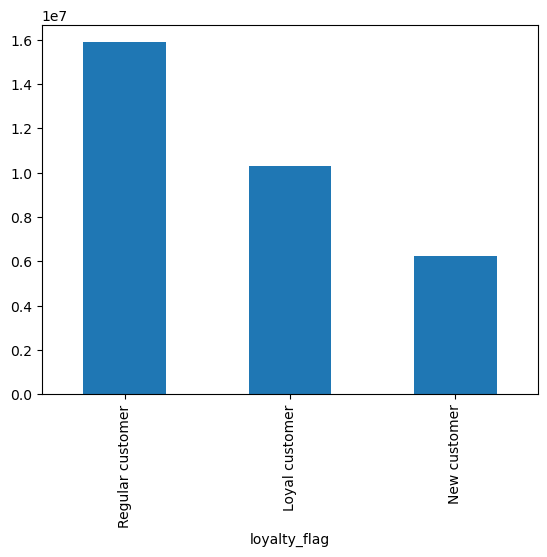

In [30]:
# Creating bar chart

cop['loyalty_flag'].value_counts().plot.bar()

Regular customers make the most orders.

### Creating a line chart for price and hour of the day relationship

In [37]:
# Creating a 80/20 sample for the line chart

np.random.seed(4)
dev = np.random.rand(len(cop)) <= 0.8

In [40]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [47]:
# Creating the 80% list 

big = cop[dev]

In [48]:
# Creating the 20% list

small = cop [~dev]

In [57]:
# Checking if the split is correct

len(cop)

32404859

In [55]:
len(big) + len(small)

32404859

In [64]:
small.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,buying_frequency,frequency_flag,surname,sex,state,age,date_joined,#_of_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,2398795,1,prior,2,3,7,15.0,10258,2,0,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
12,473747,1,prior,3,3,12,21.0,12427,2,1,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
13,473747,1,prior,3,3,12,21.0,10258,3,1,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [98]:
# Narrowing down the number of columns

df_2 = small[['prices','order_hour_of_day']]

In [78]:
df_2.head()

,prices,order_hour_of_day
0,9.0,8
2,4.4,8
6,3.0,7
12,4.4,12
13,3.0,12


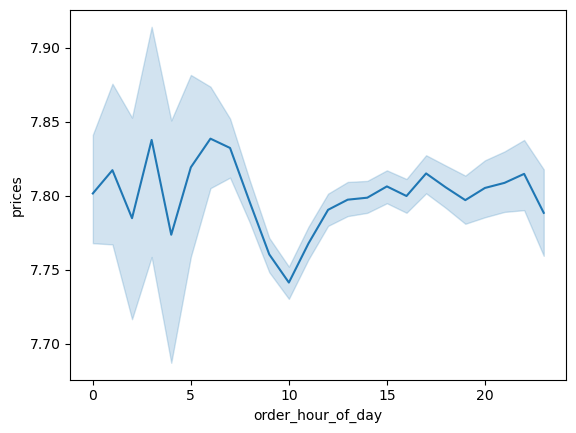

In [134]:
# Creating a line chart for price fluctuations for hours of day

line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

### Creating a line chart for age and dependant relationship

In [96]:
# Narrowing down the number of columns to figure out the age and family status connection

df_3 = small[['age','#_of_dependants']]

In [100]:
df_3.head()

,age,#_of_dependants
0,31,3
2,31,3
6,31,3
12,31,3
13,31,3


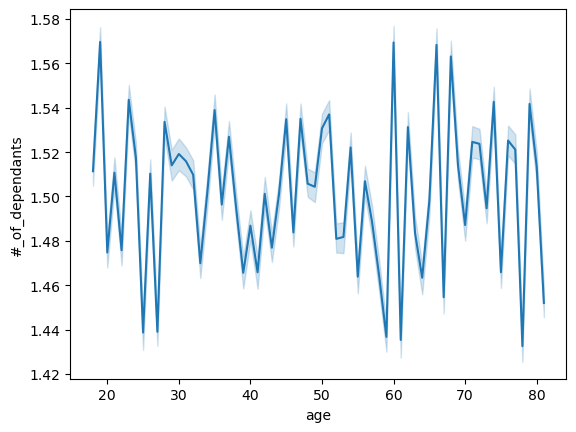

In [132]:
# Creating a line chart for age and family status connection

line_2 = sns.lineplot(data = df_3, x = 'age', y = '#_of_dependants')

The results seem to be very mixed, so there seems to be no connection between age and the number of dependants.

### Creating a scatterplot

<Axes: xlabel='age', ylabel='income'>

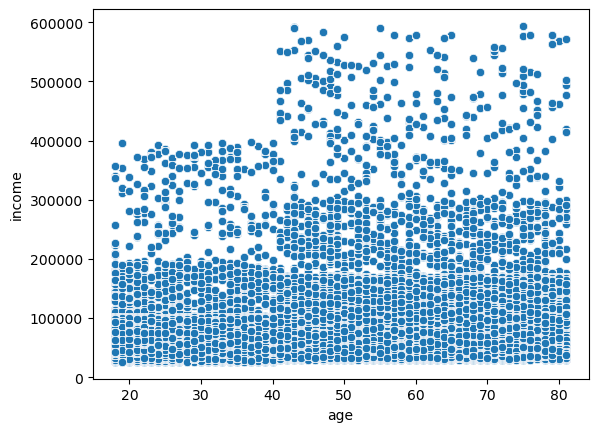

In [112]:
# Creating a scatterplot 

sns.scatterplot(x = 'age', y = 'income', data = cop)

The results show majority of the people, no matter the age group earn between 0 and 200,000. It also shows that people under 40 don't earn more than 400,000. People between 40 and 80 have the highest income, with some of it even nearing 600,000.

# 04. Exporting the Visualizations

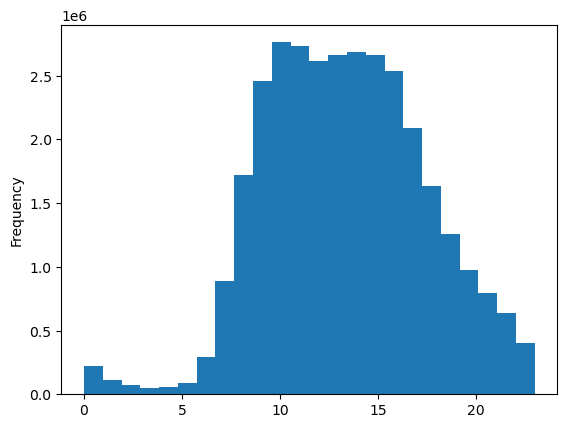

In [124]:
# Saving the visualization as png

hist = cop['order_hour_of_day'].plot.hist(bins = 24)

In [126]:
# Saving the histogram as png

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_frequency.png'))

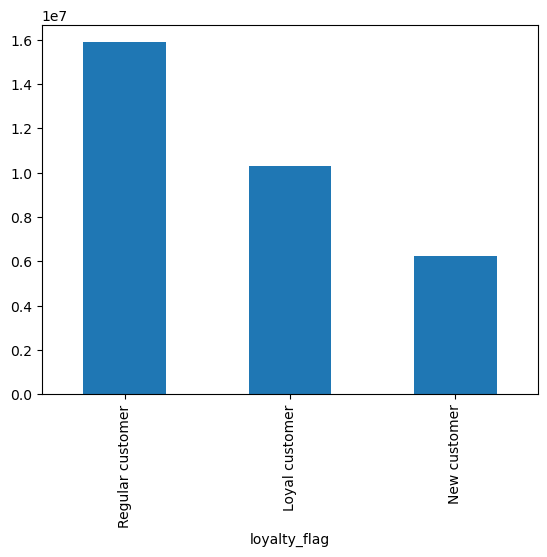

In [128]:
bar = cop['loyalty_flag'].value_counts().plot.bar()

In [130]:
# Saving the histogram as png

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [136]:
# Saving the line chart 1 as png

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_prices_line_chart.png'))

In [138]:
# Saving the line chart 2 as png

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_fam_status_line_chart.png'))

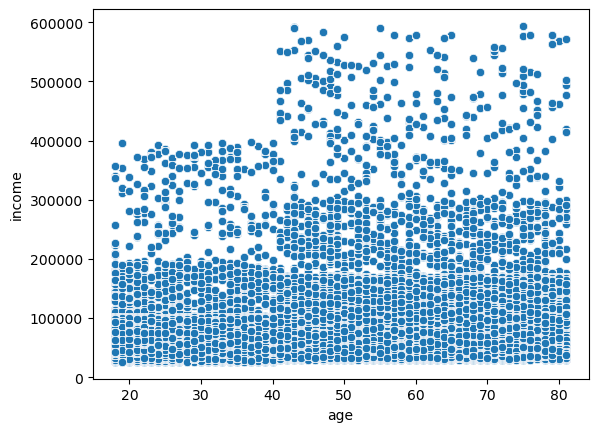

In [140]:
scatter = sns.scatterplot(x = 'age', y = 'income', data = cop)

In [142]:
# Saving the scatterplot

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))